## Fashion MNIST Basic GAN

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import matplotlib

In [38]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion', one_hot = True, reshape= False)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [39]:
X_train = data.train.images
y_train = data.train.labels

X_test = data.test.images
y_test = data.test.labels

In [40]:
print (X_train.shape)
print (y_train.shape)

(55000, 28, 28, 1)
(55000, 10)


In [41]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    
    return fig, axes

In [42]:
_, t = view_samples(1, X_train)

ValueError: cannot reshape array of size 28 into shape (28,28)

In [60]:
def plot_images_separately(images):
    "Plot the six MNIST images separately."
    fig = plt.figure()
    for j in range(1, 7):
        ax = fig.add_subplot(1, 6, j)
        ax.matshow(images[j-1], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

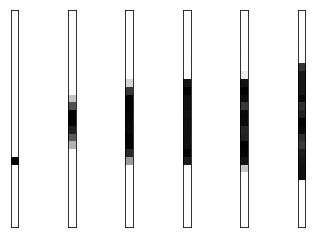

In [62]:
plot_images_separately(X_train[0])

In [126]:
def plot_images_together(images):
    """ Plot a single image containing all six MNIST images, one after
    the other.  Note that we crop the sides of the images so that they
    appear reasonably close together."""
    fig = plt.figure()
    images = [image[:, :] for image in images]
    image = np.concatenate(images, axis=1)
    ax = fig.add_subplot(1, 3, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

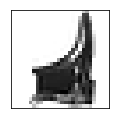

In [127]:
plot_images_together(X_train[5])

### Building the model

In [92]:
def input_placeholders(real, fake):
    X_real = tf.placeholder(tf.float32, shape=[None, real], name="X_real")
    X_fake = tf.placeholder(tf.float32, shape=[None, fake], name="X_fake")
    
    return X_real, X_fake

In [119]:
def generator(fake, channels, hidden_units, reuse):
    with tf.variable_scope('generator', reuse = reuse):
        model = tf.layers.dense(fake, hidden_units, activation = None)
        model = tf.maximum(0.01 * model, model)
        model = tf.layers.dense(model, channels, activation = None)
        model = tf.tanh(model)
        
        return model

In [120]:
def discriminator(real, hidden_units, reuse):
    with tf.variable_scope('discriminator', reuse = reuse):
        model = tf.layers.dense(real, hidden_units, activation = None)
        model = tf.maximum(0.01 * model, model)
        model = tf.layers.dense(model, 1, activation = None)
        output = tf.sigmoid(model)
    
    return output, model

In [122]:
## Dimension for generator and discriminator
fake_dim = 128
real_dim = 784

## Units in hidden layers 
hidden_units_fake = 128
hidden_units_real = 128

## Output Dimension
channels = 128

In [123]:
tf.reset_default_graph()

##Placeholders for dimensions
X_real, X_fake = input_placeholders(real_dim, fake_dim)

## Generator
model_generator = generator(X_fake, channels = real_dim, hidden_units = hidden_units_fake, reuse = False)

## Discriminator_REAL
logits_discriminator_real, model_discriminator_real = discriminator(X_real, hidden_units = hidden_units_real, 
                                                                    reuse = False)
## Discriminator_FAKE
logits_discriminator_fake, model_discriminator_fake = discriminator(model_generator, hidden_units = hidden_units_real, 
                                                                    reuse = True)